<Figure size 864x864 with 0 Axes>

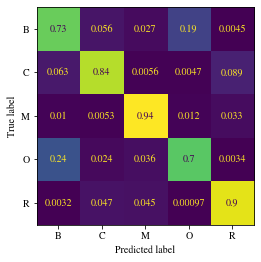

In [4]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'STIXGeneral'

df = pd.read_csv("test_predictions.csv")

column_names = ["BACKGROUND", "CONCLUSIONS", "METHODS", "OBJECTIVE", "RESULTS"]

y_column_names = [f"y_{column_name}" for column_name in column_names]
yhat_column_names = [f"yhat_{column_name}" for column_name in column_names]

def find_argmax(row, column_names):
    maximum = -1
    argmax = ""
    for column_name in column_names:
        current_value = row[column_name]
        if current_value > maximum:
            argmax = column_name
            maximum = current_value
    return argmax.split("_")[-1]

y_true = df.apply(lambda row: find_argmax(row, column_names=y_column_names), axis=1)
y_pred = df.apply(lambda row: find_argmax(row, column_names=yhat_column_names), axis=1)

cm = confusion_matrix(y_true, y_pred, normalize='true')
plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(cm, display_labels=[column_name[0] for column_name in column_names])
disp.plot(xticks_rotation="horizontal", colorbar=False)


In [ ]:

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "ABCDEFGHIJK"],
                  columns = [i for i in "ABCDEFGHIJK"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)